In [5]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, log_loss, accuracy_score
from fastai.tabular.all import *
pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

In [6]:
data = pd.read_csv("C:\\Users\\91923\\Downloads\\data (1).csv")
display(data[0:3].T)
print(data.columns.tolist())

,0,1,2
id,842302,842517,84300903
diagnosis,M,M,M
Radius_mean,17.99,20.57,19.69
Texture_mean,10.38,21.77,21.25
perimeter_mean,122.80,132.90,130.00
area_mean,1001.00,1326.00,1203.00
smoothness_mean,0.12,0.08,0.11
compactness_mean,0.28,0.08,0.16
concavity_mean,0.30,0.09,0.20
concave points_mean,0.15,0.07,0.13


['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [7]:
Name=['B','M']
Name2=['Benign','Malignant']
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name))
print(normal_mapping)

{'B': 0, 'M': 1}


In [8]:
display(data['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
m=len(data)
print(m)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

569


In [10]:
train=data.iloc[M[0:(m//4)*3]]
test=data.iloc[M[(m//4)*3:]]
print(len(train),len(test))
testY=test['diagnosis'].map(normal_mapping)
testX=test.drop('diagnosis',axis=1)

426 143


In [11]:
splits = RandomSplitter(seed=42)(train) 
display(splits)
print(len(splits[0]),len(splits[1]))

((#341) [251,355,165,159,120,193,413,391,207,16...],
 (#85) [198,168,246,34,158,91,46,294,412,227...])

341 85


In [12]:
dls = TabularPandas(train, splits=splits,
    cat_names = ['id',],
    cont_names =['Radius_mean', 'Texture_mean', 'perimeter_mean', 
                 'area_mean', 'smoothness_mean', 'compactness_mean', 
                 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
                 'fractal_dimension_mean', 'radius_se', 'texture_se', 
                 'perimeter_se', 'area_se', 'smoothness_se', 
                 'compactness_se', 'concavity_se', 'concave points_se', 
                 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 
                 'texture_worst', 'perimeter_worst', 'area_worst', 
                 'smoothness_worst', 'compactness_worst', 
                 'concavity_worst', 'concave points_worst', 
                 'symmetry_worst', 'fractal_dimension_worst'],
    y_names='diagnosis', y_block = CategoryBlock(),
    procs = [Categorify, FillMissing, Normalize]).dataloaders(path=".")
dls

In [13]:
learn = tabular_learner(dls,layers=[200,100],metrics=accuracy)
learn

In [14]:
learn.fit_one_cycle(10,0.01) 

epoch,train_loss,valid_loss,accuracy,time
0,0.432405,0.489313,0.952941,00:00
1,0.271973,0.199336,0.976471,00:00
2,0.189762,0.110915,0.976471,00:00
3,0.144258,0.117220,0.976471,00:00
4,0.112630,0.164859,0.964706,00:00
5,0.089455,0.199669,0.964706,00:00
6,0.073559,0.171670,0.964706,00:01
7,0.060963,0.160119,0.952941,00:00
8,0.051260,0.156034,0.952941,00:00
9,0.043575,0.155893,0.964706,00:00


In [15]:
preds, targs = learn.get_preds()
display(preds)
display(targs)

tensor([[1.4834e-05, 9.9999e-01],
        [9.9983e-01, 1.7198e-04],
        [3.8346e-07, 1.0000e+00],
        [9.9998e-01, 1.6287e-05],
        [4.9421e-01, 5.0579e-01],
        [9.9944e-01, 5.6014e-04],
        [9.9962e-01, 3.8164e-04],
        [9.9660e-01, 3.3964e-03],
        [6.8188e-06, 9.9999e-01],
        [9.7229e-01, 2.7706e-02],
        [9.9986e-01, 1.3825e-04],
        [9.9970e-01, 2.9555e-04],
        [9.9987e-01, 1.2544e-04],
        [9.9636e-01, 3.6398e-03],
        [5.0748e-08, 1.0000e+00],
        [9.9983e-01, 1.7323e-04],
        [9.9985e-01, 1.5033e-04],
        [1.0693e-02, 9.8931e-01],
        [7.9869e-06, 9.9999e-01],
        [1.6228e-04, 9.9984e-01],
        [4.2123e-06, 1.0000e+00],
        [9.9272e-01, 7.2822e-03],
        [9.9964e-01, 3.6380e-04],
        [9.9964e-01, 3.6113e-04],
        [9.9998e-01, 1.7648e-05],
        [5.0443e-01, 4.9557e-01],
        [9.9998e-01, 1.7205e-05],
        [9.9952e-01, 4.8011e-04],
        [1.0762e-01, 8.9238e-01],
        [9.999

tensor([[1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],

In [16]:
targs=targs.numpy() 
preds=np.argmax(preds.numpy(), axis=-1)
print(preds[0:3])
print(targs[0:3])

[1 0 1]
[[1]
 [1]
 [1]]


In [17]:
print(classification_report(targs,preds,target_names=Name2,digits=4))

              precision    recall  f1-score   support

      Benign     0.9683    0.9839    0.9760        62
   Malignant     0.9545    0.9130    0.9333        23

    accuracy                         0.9647        85
   macro avg     0.9614    0.9485    0.9547        85
weighted avg     0.9645    0.9647    0.9645        85



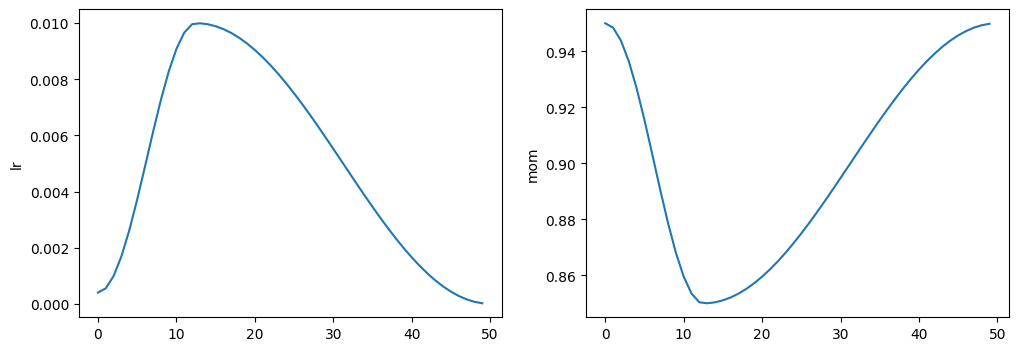

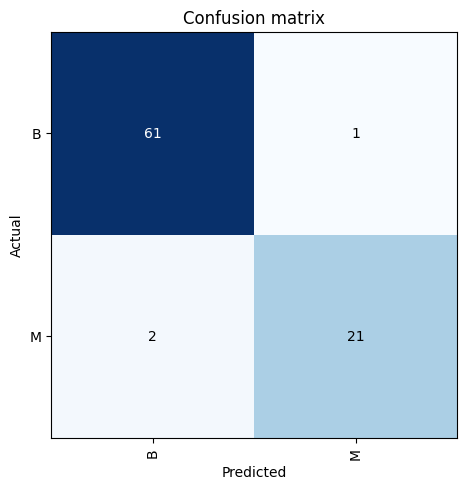

In [18]:
learn.recorder.plot_sched()
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [19]:
learn.show_results()


,id,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,diagnosis_pred
0,0.00,-0.15,-1.42,-0.18,-0.26,0.02,-0.36,-0.67,-0.63,-1.64,0.07,-0.84,-1.38,-0.86,-0.66,-1.04,-0.50,-0.53,-0.83,-0.86,-0.42,-0.22,-1.53,-0.25,-0.33,-0.04,-0.08,-0.48,-0.53,-0.87,0.13,0.00,0.00
1,0.00,-1.91,1.22,-1.92,-1.47,-3.20,-1.18,-1.19,-1.31,-0.82,-0.58,-0.12,0.28,-0.21,-0.61,0.08,-1.17,-1.09,-1.89,0.78,-0.41,-1.48,0.76,-1.50,-1.14,-1.88,-1.20,-1.34,-1.77,-0.04,-0.77,0.00,0.00
2,0.00,-1.23,0.46,-1.26,-1.07,-1.10,-1.27,-1.16,-1.17,-0.67,0.21,-0.94,0.14,-0.98,-0.82,-0.46,-1.12,-1.02,-1.33,-0.77,-0.53,-1.12,0.53,-1.17,-0.94,-0.86,-1.16,-1.28,-1.37,-0.93,-0.23,0.00,0.00
3,0.00,1.58,-0.11,1.56,1.60,0.94,0.74,1.83,1.86,0.02,-0.25,0.62,0.25,0.40,0.77,-0.62,0.12,0.37,-0.01,-0.42,-0.26,1.63,0.76,1.42,1.59,0.87,0.69,1.57,1.40,0.63,0.28,1.00,1.00
4,0.00,-0.48,-0.69,-0.47,-0.55,1.44,0.05,-0.40,-0.44,0.45,0.45,-0.64,-0.28,-0.76,-0.62,0.99,-0.57,-0.21,-0.04,0.94,-0.51,-0.60,-0.71,-0.65,-0.62,1.17,-0.52,-0.42,-0.48,0.44,-0.51,0.00,0.00
5,0.00,-0.56,-0.32,-0.60,-0.58,-0.68,-0.77,-0.76,-0.61,0.54,-0.98,-0.33,0.87,-0.47,-0.42,-0.40,-0.17,-0.39,-0.18,0.66,-0.58,-0.48,0.52,-0.58,-0.51,-0.35,-0.49,-0.67,-0.30,0.95,-0.85,0.00,0.00
6,0.00,-0.99,1.14,-1.01,-0.90,-1.05,-0.76,-0.98,-1.09,0.57,0.05,0.43,1.10,0.37,-0.21,0.47,-0.41,-0.65,-0.95,0.52,-0.34,-0.71,0.94,-0.74,-0.70,-0.52,-0.59,-1.04,-1.27,0.28,-0.46,0.00,0.00
7,0.00,-0.38,-0.30,-0.39,-0.45,0.23,-0.20,-0.67,-0.70,-0.35,-0.42,-0.61,-0.28,-0.64,-0.57,-0.62,-0.52,-0.38,-0.59,-0.39,-0.38,-0.45,-0.15,-0.49,-0.49,-0.14,-0.28,-0.49,-0.55,-0.20,-0.30,0.00,0.00
8,0.00,-0.30,-0.91,-0.30,-0.35,-0.17,-0.40,0.06,-0.39,0.02,-0.12,-0.59,-0.78,-0.62,-0.50,0.59,-0.33,-0.05,-0.37,0.90,-0.17,-0.34,-0.85,-0.31,-0.38,0.71,-0.21,0.13,-0.27,1.62,0.08,0.00,0.00


In [20]:
tst_dl = learn.dls.test_dl(testX)
tpreds,_ = learn.get_preds(dl=tst_dl)
print(tpreds[0:3])
tpreds2=np.argmax(tpreds, axis=-1)
print(tpreds2[0:3])

tensor([[9.0143e-01, 9.8571e-02],
        [9.9993e-01, 6.7503e-05],
        [3.4279e-07, 1.0000e+00]])
tensor([0, 0, 1])


In [21]:
print(testY)
print(tpreds2)

263    1
306    0
129    1
122    1
279    0
      ..
35     1
253    1
283    1
557    0
413    0
Name: diagnosis, Length: 143, dtype: int64
tensor([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])


In [22]:
print(classification_report(testY,tpreds2,target_names=Name2,digits=4))

              precision    recall  f1-score   support

      Benign     0.9551    0.9770    0.9659        87
   Malignant     0.9630    0.9286    0.9455        56

    accuracy                         0.9580       143
   macro avg     0.9590    0.9528    0.9557       143
weighted avg     0.9582    0.9580    0.9579       143

